### 1. Importing libraries and reading the dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('E:/Data Science/Competitions/Projects/Poverty Level Prediction')

In [5]:
df = pd.read_csv('data.csv')
df.head()


,monthly_rent,rooms,has_bathroom,has_fridge,has_tablet,n_tablets,n_males,n_females,n_under_12,n_above_12,...,roof_material_type,water_provision_type,elec_provider_type,toilet_type,garbage_disposal_type,energy_source_type,edu_primary,edu_sec,edu_techsec,is_overcrowded
0,190000.000000,3,1,1,0,0,1,0,0,1,...,cement,inside,other,other,buried,other,0,0,0,0
1,135000.000000,4,1,1,1,1,1,0,0,1,...,metal,inside,other,other,buried,elec,0,0,0,0
2,192412.491466,8,1,1,0,0,0,1,0,1,...,metal,inside,other,other,buried,elec,0,1,0,0
3,180000.000000,5,1,1,1,1,2,2,1,3,...,metal,inside,other,other,buried,elec,0,0,0,0
4,180000.000000,5,1,1,1,1,2,2,1,3,...,metal,inside,other,other,buried,elec,0,1,0,0


### Viewing the numerical and categorical columns

In [7]:
num_cols = df.select_dtypes(exclude = 'object').columns.tolist()
cat_cols = df.select_dtypes(include = 'object').columns.tolist()

print('Numerical features:')
print(num_cols)

print('\nCategorical features:')
print(cat_cols)

Numerical features:
['monthly_rent', 'rooms', 'has_bathroom', 'has_fridge', 'has_tablet', 'n_tablets', 'n_males', 'n_females', 'n_under_12', 'n_above_12', 'n_persons', 'schooling_years', 'schooling_years_behind', 'has_floor', 'has_ceiling', 'has_water_provision', 'has_electricity', 'has_toilet', 'has_kitchen', 'is_wall_quality_good', 'is_roof_quality_good', 'is_floor_quality_good', 'disabled_person', 'is_married', 'is_house_head', 'is_partner', 'is_parent', 'n_children', 'n_adults', 'n_above_65', 'dependency_rate', 'male_years_of_education', 'female_years_of_education', 'adults_years_of_education', 'has_edu_level', 'edu_ug_above', 'edu_pg', 'n_bed', 'n_persons_per_room', 'has_computer', 'has_tv', 'has_mobile', 'n_mobiles', 'age', 'Target', 'edu_primary', 'edu_sec', 'edu_techsec', 'is_overcrowded']

Categorical features:
['ownership', 'region', 'zone', 'gender', 'wall_material_type', 'floor_material_type', 'roof_material_type', 'water_provision_type', 'elec_provider_type', 'toilet_type'

### Distribution of Target variable

##### Target  Variable - 'Target' which has the labels as 1,2,3,4 and it represents the poverty level

1 - extreme poverty

2 - moderate poverty

3 - vulnerable households

4 - non vulnerable households

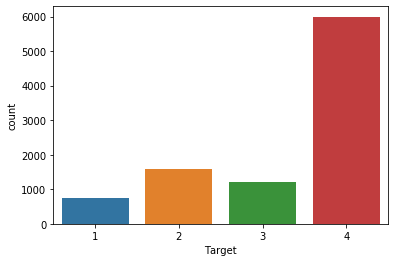

In [4]:
sns.countplot(df['Target'])
plt.show()

### Univariate Analysis

Monthly Rent: 


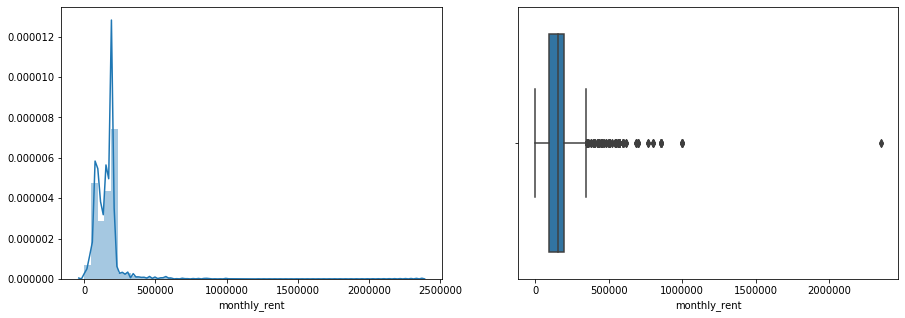

In [5]:
print('Monthly Rent: ')
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sns.distplot(df['monthly_rent'], ax = axes[0])
sns.boxplot(df['monthly_rent'], ax = axes[1])
plt.show()

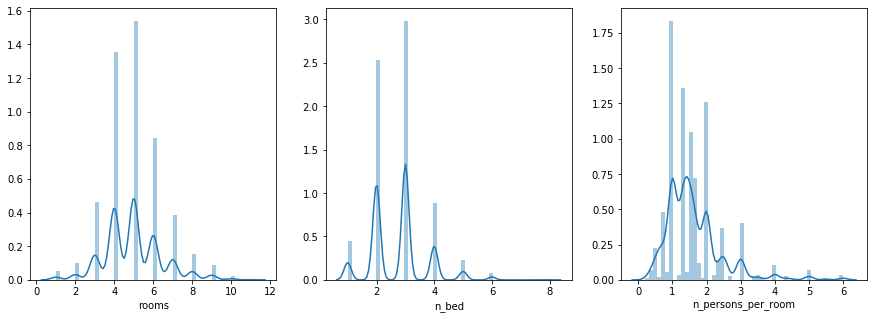

In [6]:

fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.distplot(df['rooms'], ax = axes[0])
sns.distplot(df['n_bed'], ax = axes[1])
sns.distplot(df['n_persons_per_room'], ax = axes[2])
plt.show()


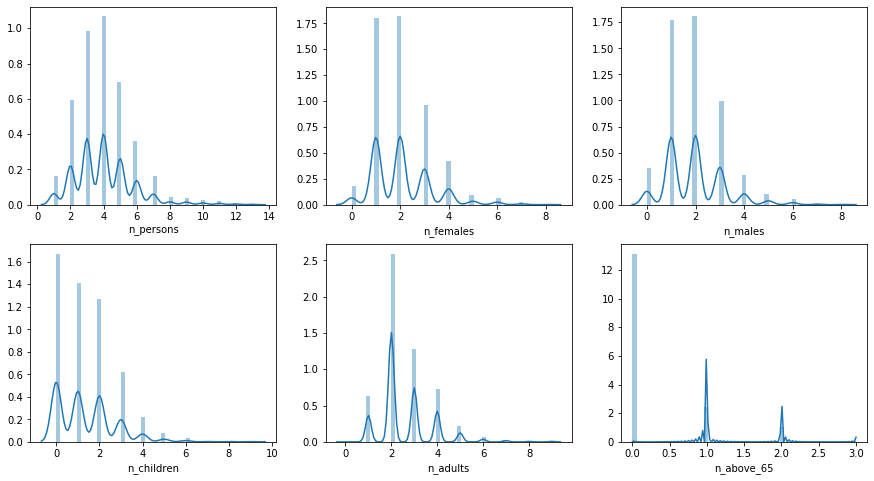

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (15,8))
sns.distplot(df['n_persons'], ax = axes[0][0])
sns.distplot(df['n_females'], ax = axes[0][1])
sns.distplot(df['n_males'], ax = axes[0][2])
sns.distplot(df['n_children'], ax = axes[1][0])
sns.distplot(df['n_adults'], ax = axes[1][1])
sns.distplot(df['n_above_65'], ax = axes[1][2])
plt.show()

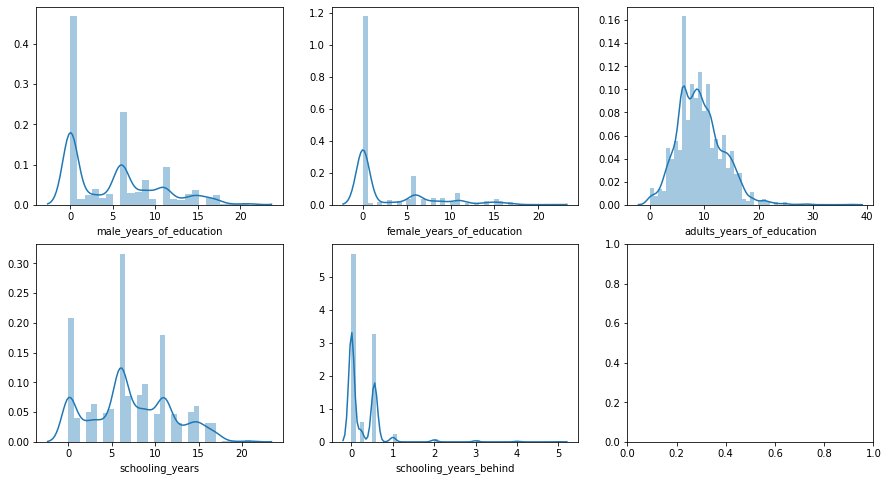

In [8]:

fig, axes = plt.subplots(2, 3, figsize = (15,8))
sns.distplot(df['male_years_of_education'], ax = axes[0][0])
sns.distplot(df['female_years_of_education'], ax = axes[0][1])
sns.distplot(df['adults_years_of_education'], ax = axes[0][2])
sns.distplot(df['schooling_years'], ax = axes[1][0])
sns.distplot(df['schooling_years_behind'], ax = axes[1][1])
plt.show()

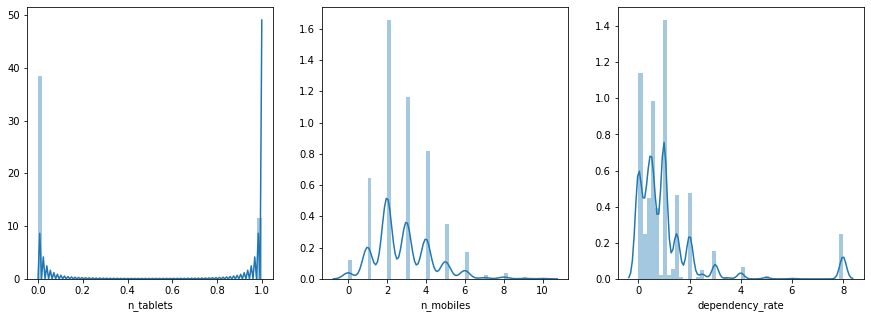

In [9]:

fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.distplot(df['n_tablets'], ax = axes[0])
sns.distplot(df['n_mobiles'], ax = axes[1])
sns.distplot(df['dependency_rate'], ax = axes[2])
plt.show()



### Observations:

1. The features are highly skewed like monthly rent, schooling_years_behind
2. Some features are ordinal in nature like room, n_bed, n_mobiles
3. Dependency rate is very low for most of the households
4. a large number of male and females are not educated
5. a few households have older people
6. most households have upto 4 members in the family and a few of them have more than 7 members

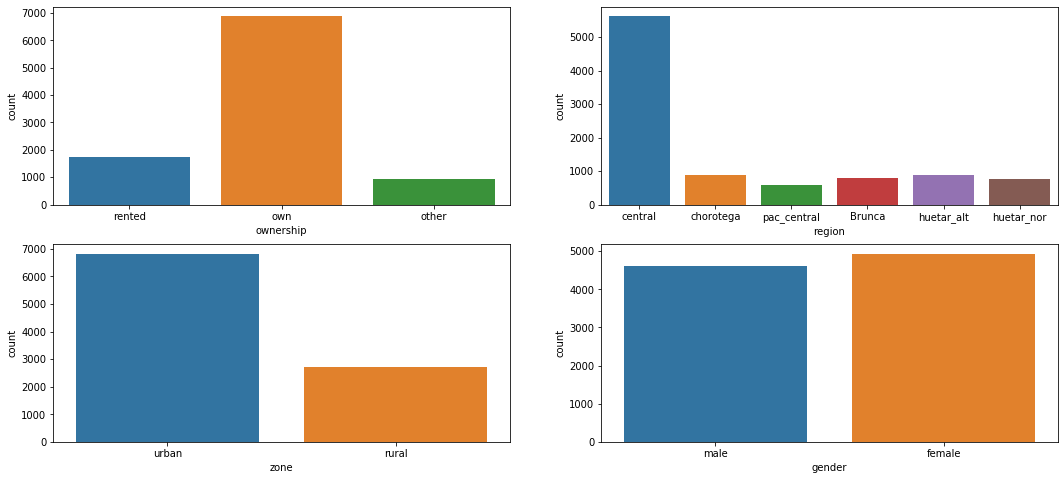

In [10]:


fig, axes = plt.subplots(2, 2, figsize = (18,8))
sns.countplot(df['ownership'], ax = axes[0][0])
sns.countplot(df['region'], ax = axes[0][1])
sns.countplot(df['zone'], ax = axes[1][0])
sns.countplot(df['gender'], ax = axes[1][1])

plt.show()



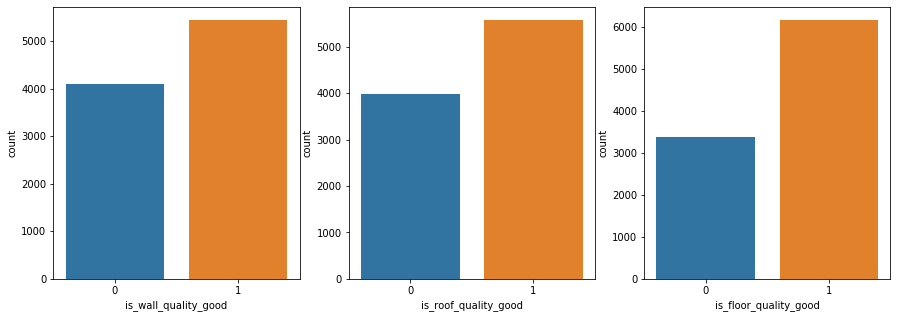

In [11]:


## house quality

fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(df['is_wall_quality_good'], ax = axes[0])
sns.countplot(df['is_roof_quality_good'], ax = axes[1])
sns.countplot(df['is_floor_quality_good'], ax = axes[2])
plt.show()


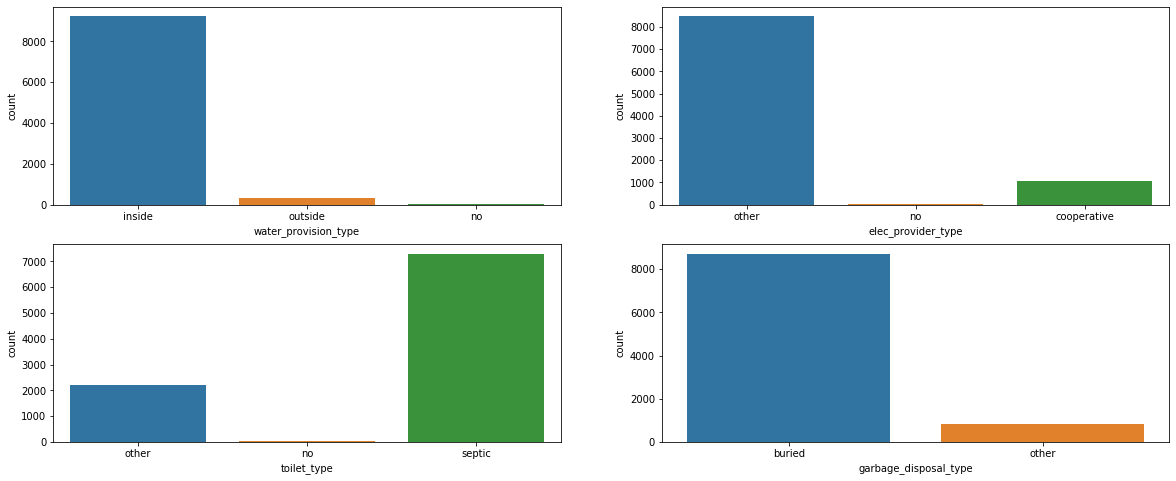

In [12]:

## facilities - 'water_provision_type', 'elec_provider_type', 'toilet_type', 'garbage_disposal_type'

fig, axes = plt.subplots(2, 2, figsize = (20,8))
sns.countplot(df['water_provision_type'], ax = axes[0][0])
sns.countplot(df['elec_provider_type'], ax = axes[0][1])
sns.countplot(df['toilet_type'], ax = axes[1][0])
sns.countplot(df['garbage_disposal_type'], ax = axes[1][1])

plt.show()

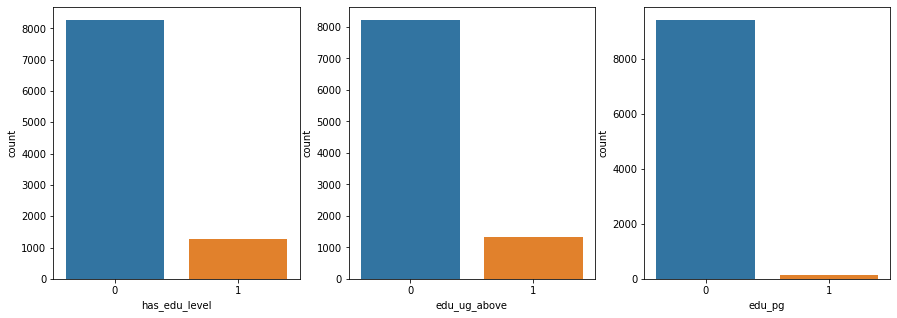

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(df['has_edu_level'], ax = axes[0])
sns.countplot(df['edu_ug_above'], ax = axes[1])
sns.countplot(df['edu_pg'], ax = axes[2])
plt.show()



### Observations:

1. Most of the households are owned and in central region and are in urban zone
2. A few households are not provided electricity, water and toilet facilities
3. Not all the members of the household are neither highly educated nor have completed their primary education

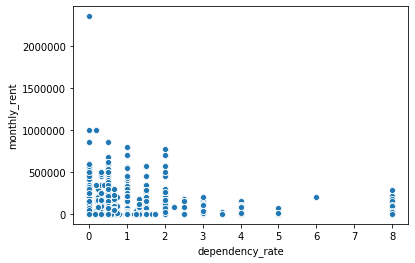

In [14]:
## bivariate plots

sns.scatterplot(df['dependency_rate'], df['monthly_rent'])
plt.show()

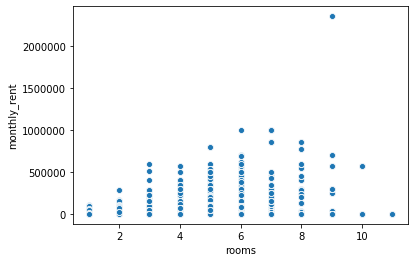

In [15]:
## bivariate plots

sns.scatterplot(df['rooms'], df['monthly_rent'])
plt.show()

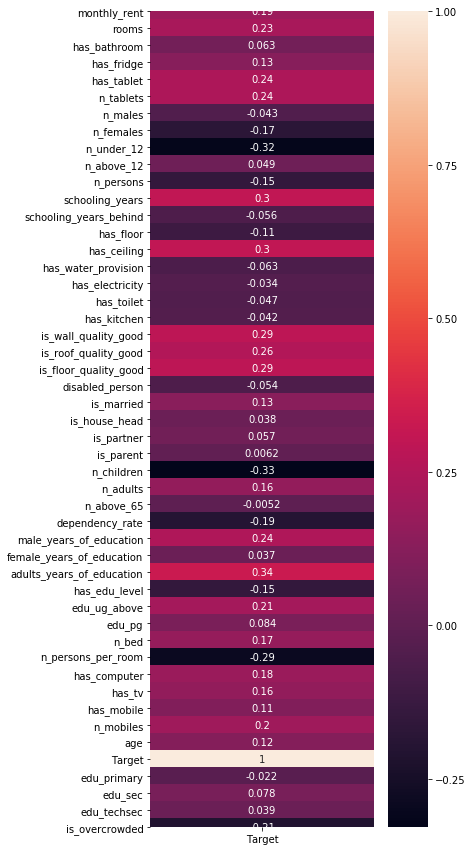

In [14]:
plt.figure(figsize = (5,15))
ax = sns.heatmap(df.corr()[['Target']], annot = True)
plt.show()

In [15]:
## As the data is duplicated, that is there are records for each and every member of the house.

## We would consider only the record which has is_house_head as 1

df[df['is_house_head'] == 1].shape

(2973, 61)

In [16]:
df[df['is_house_head'] == 1].to_csv('E:\Data Science\Competitions\Projects\Poverty Level Prediction\data1.csv', index = False)

### Statistical Tests

In [22]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

target = 'Target'

In [18]:
num_cols = df.select_dtypes(exclude = 'object').columns.tolist()

In [19]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()

In [20]:
for i in cat_cols:
    print(i, df[i].unique())

ownership ['rented' 'own' 'other']
region ['central' 'chorotega' 'pac_central' 'Brunca' 'huetar_alt' 'huetar_nor']
zone ['urban' 'rural']
gender ['male' 'female']
wall_material_type ['brick' 'other' 'cement']
floor_material_type ['ceramic' 'other' 'cement' 'no']
roof_material_type ['cement' 'metal' 'other']
water_provision_type ['inside' 'outside' 'no']
elec_provider_type ['other' 'no' 'cooperative']
toilet_type ['other' 'no' 'septic']
garbage_disposal_type ['buried' 'other']
energy_source_type ['other' 'elec' 'no']


In [24]:
d = {1: 'extreme poverty', 2: 'moderate poverty', 3: 'vulnerable households', 4: 'non vulnerable households'}

df['tname'] = df['Target'].map(d)

In [25]:
## chisquare

def chi_test(col):
    d = pd.crosstab(df[col],df['tname']).values
    tstat, p, dof, expv = chi2_contingency(d)
    return p

pval = []
for i in cat_cols:
    pval.append(chi_test(i))
pd.DataFrame({'a': cat_cols,'b':pval})

,a,b
0,ownership,1.800752e-42
1,region,1.569919e-67
2,zone,2.580426e-21
3,gender,2.132325e-03
4,wall_material_type,5.267642e-159
5,floor_material_type,5.320077e-172
6,roof_material_type,1.729973e-03
7,water_provision_type,7.146624e-20
8,elec_provider_type,8.081964e-03
9,toilet_type,8.016205e-17


In [29]:
print(num_cols)

['monthly_rent', 'rooms', 'has_bathroom', 'has_fridge', 'has_tablet', 'n_tablets', 'n_males', 'n_females', 'n_under_12', 'n_above_12', 'n_persons', 'schooling_years', 'schooling_years_behind', 'has_floor', 'has_ceiling', 'has_water_provision', 'has_electricity', 'has_toilet', 'has_kitchen', 'is_wall_quality_good', 'is_roof_quality_good', 'is_floor_quality_good', 'disabled_person', 'is_married', 'is_house_head', 'is_partner', 'is_parent', 'n_children', 'n_adults', 'n_above_65', 'dependency_rate', 'male_years_of_education', 'female_years_of_education', 'adults_years_of_education', 'has_edu_level', 'edu_ug_above', 'edu_pg', 'n_bed', 'n_persons_per_room', 'has_computer', 'has_tv', 'has_mobile', 'n_mobiles', 'age', 'Target', 'edu_primary', 'edu_sec', 'edu_techsec', 'is_overcrowded']


In [49]:
col1 = ['monthly_rent', 'rooms',  'n_tablets', 'n_males', 'n_females', 
 'n_under_12', 'n_above_12', 'n_persons', 'schooling_years', 'schooling_years_behind', 'n_children',
 'n_adults', 'n_above_65', 'dependency_rate', 'male_years_of_education', 
 'female_years_of_education', 'adults_years_of_education', 
 'n_bed', 'n_persons_per_room',  'n_mobiles',
 'age']

col2 = ['has_bathroom', 'has_fridge', 'has_tablet', 'has_floor', 
'has_ceiling', 'has_water_provision', 'has_electricity', 'has_toilet', 'has_kitchen', 'is_wall_quality_good',
'is_roof_quality_good', 'is_floor_quality_good', 'disabled_person', 'is_married', 'is_house_head', 'is_partner', 
'is_parent','has_edu_level', 'edu_ug_above', 'edu_pg','has_computer', 'has_tv', 'has_mobile','edu_primary', 
'edu_sec', 'edu_techsec', 'is_overcrowded']

In [62]:
## anova test

pval = []

def anova_test1(col):
    for i in col:
        c = 'Target ~ '  + i 
        ##print(c)
        model = ols(c , data = df).fit()
        aov_table = sm.stats.anova_lm(model, typ = 2)
        pval.append(aov_table['PR(>F)'][0])
    return pval


In [63]:
p = anova_test1(col1)
    
pd.DataFrame({'a': col1,'b':p})

,a,b
0,monthly_rent,5.599113e-76
1,rooms,3.751077e-111
2,n_tablets,4.360903e-124
3,n_males,2.233262e-05
4,n_females,8.570166e-66
5,n_under_12,1.120822e-221
6,n_above_12,1.725860e-06
7,n_persons,1.179198e-47
8,schooling_years,3.828303e-201
9,schooling_years_behind,4.239254e-08


In [64]:
pval = []
for i in col2:
    pval.append(chi_test(i))
pd.DataFrame({'a': col2,'b':pval})

,a,b
0,has_bathroom,3.129670e-09
1,has_fridge,7.667793e-35
2,has_tablet,5.743782e-136
3,has_floor,3.866414e-26
4,has_ceiling,1.653331e-203
5,has_water_provision,7.199138e-15
6,has_electricity,8.456004e-04
7,has_toilet,2.569365e-05
8,has_kitchen,1.120684e-05
9,is_wall_quality_good,2.490797e-180


##### The insignificant variables after perfroming the above tests are elec_provider_type, n_above_65 and is_parent

In [71]:
### Dropping the insignificant variables

ndf = df.drop(['elec_provider_type','n_above_65','is_parent'], axis = 1)
ndf.shape

(9557, 59)

In [72]:
ndf = ndf.drop(['tname'], axis = 1)
ndf.shape

(9557, 58)

In [73]:
ndf.head()

,monthly_rent,rooms,has_bathroom,has_fridge,has_tablet,n_tablets,n_males,n_females,n_under_12,n_above_12,...,floor_material_type,roof_material_type,water_provision_type,toilet_type,garbage_disposal_type,energy_source_type,edu_primary,edu_sec,edu_techsec,is_overcrowded
0,190000.000000,3,1,1,0,0,1,0,0,1,...,ceramic,cement,inside,other,buried,other,0,0,0,0
1,135000.000000,4,1,1,1,1,1,0,0,1,...,other,metal,inside,other,buried,elec,0,0,0,0
2,192412.491466,8,1,1,0,0,0,1,0,1,...,ceramic,metal,inside,other,buried,elec,0,1,0,0
3,180000.000000,5,1,1,1,1,2,2,1,3,...,ceramic,metal,inside,other,buried,elec,0,0,0,0
4,180000.000000,5,1,1,1,1,2,2,1,3,...,ceramic,metal,inside,other,buried,elec,0,1,0,0


In [76]:
print(ndf.columns.tolist())

['monthly_rent', 'rooms', 'has_bathroom', 'has_fridge', 'has_tablet', 'n_tablets', 'n_males', 'n_females', 'n_under_12', 'n_above_12', 'n_persons', 'schooling_years', 'schooling_years_behind', 'has_floor', 'has_ceiling', 'has_water_provision', 'has_electricity', 'has_toilet', 'has_kitchen', 'is_wall_quality_good', 'is_roof_quality_good', 'is_floor_quality_good', 'disabled_person', 'is_married', 'is_house_head', 'is_partner', 'n_children', 'n_adults', 'dependency_rate', 'male_years_of_education', 'female_years_of_education', 'adults_years_of_education', 'has_edu_level', 'edu_ug_above', 'edu_pg', 'n_bed', 'n_persons_per_room', 'has_computer', 'has_tv', 'has_mobile', 'n_mobiles', 'age', 'Target', 'ownership', 'region', 'zone', 'gender', 'wall_material_type', 'floor_material_type', 'roof_material_type', 'water_provision_type', 'toilet_type', 'garbage_disposal_type', 'energy_source_type', 'edu_primary', 'edu_sec', 'edu_techsec', 'is_overcrowded']


In [86]:
mdf = ndf.drop(['n_tablets','n_mobiles','wall_material_type', 'floor_material_type', 'roof_material_type',
                'water_provision_type',
                'toilet_type', 'garbage_disposal_type', 'energy_source_type'], axis = 1)

In [87]:
print(mdf.columns.tolist())

['monthly_rent', 'rooms', 'has_bathroom', 'has_fridge', 'has_tablet', 'n_males', 'n_females', 'n_under_12', 'n_above_12', 'n_persons', 'schooling_years', 'schooling_years_behind', 'has_floor', 'has_ceiling', 'has_water_provision', 'has_electricity', 'has_toilet', 'has_kitchen', 'is_wall_quality_good', 'is_roof_quality_good', 'is_floor_quality_good', 'disabled_person', 'is_married', 'is_house_head', 'is_partner', 'n_children', 'n_adults', 'dependency_rate', 'male_years_of_education', 'female_years_of_education', 'adults_years_of_education', 'has_edu_level', 'edu_ug_above', 'edu_pg', 'n_bed', 'n_persons_per_room', 'has_computer', 'has_tv', 'has_mobile', 'age', 'Target', 'ownership', 'region', 'zone', 'gender', 'edu_primary', 'edu_sec', 'edu_techsec', 'is_overcrowded']


In [88]:
mdf = pd.get_dummies(mdf, drop_first = True)
mdf.head(2)

,monthly_rent,rooms,has_bathroom,has_fridge,has_tablet,n_males,n_females,n_under_12,n_above_12,n_persons,...,is_overcrowded,ownership_own,ownership_rented,region_central,region_chorotega,region_huetar_alt,region_huetar_nor,region_pac_central,zone_urban,gender_male
0,190000.0,3,1,1,0,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,1
1,135000.0,4,1,1,1,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,1


#### Now left with 54 features and saving the data for modelling

In [89]:
mdf.to_csv('E:/Data Science/Competitions/Projects/Poverty Level Prediction/finaldata.csv', index = False)